In [1]:
pip install keras

In [0]:
# Load data
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()


In [19]:
#Print data types
print(type(x_train))
print(type(y_train))
print(type(x_test))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [4]:
#get shapes
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print('x_test shape:', x_test.shape)
print('y_test shape:', y_test.shape)

x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


In [20]:
#Take a look at the first image(at index=0) in training data
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

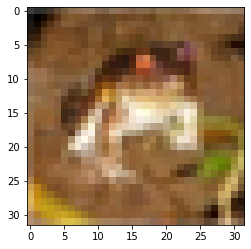

In [6]:
#Show image as picture
import matplotlib.pyplot as plt
img = plt.imshow(x_train[0])

In [7]:
#print label of image
print('label is:', y_train[0])

label is: [6]


In [8]:
#One- Hot Encoding: Convert label into set of 10 numbé to input  int to NN
from keras.utils import to_categorical
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

#print new label in training dataset
print(y_train_one_hot)


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [9]:
#print an example of new label
print(' the one hot label is:', y_train_one_hot[0])

 the one hot label is: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [0]:
#Normalize the pixels in the images to be values between 0 va 1
x_train = x_train/255
x_test = x_test/255

In [0]:
#build CNN
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

#creat the architecture
model = Sequential()

#convolution layer
model.add( Conv2D(32, (5,5), activation='relu', input_shape =(32,32,3)) )

#maxpooling layer
model.add( MaxPooling2D(pool_size = (2,2)))

#convolution layer
model.add( Conv2D(32, (5,5), activation= 'relu') )

#maxpooling layer
model.add( MaxPooling2D(pool_size = (2,2)))


#Flatten layer
model.add( Flatten())

model.add( Dense(1000, activation ='relu'))
model.add( Dense(10, activation = 'softmax'))


In [0]:
#compile model
#model.compile(loss= 'categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])
model.compile(loss='mean_squared_error', optimizer='sgd', metrics = ['accuracy'])


In [102]:
#train model
hist  = model.fit(x_train, y_train_one_hot, batch_size= 256, epochs= 10, validation_split= 0.3)


Train on 35000 samples, validate on 15000 samples
Epoch 1/10
35000/35000 [==============================] - 2s 64us/step - loss: 1.9252e-04 - acc: 0.9991 - val_loss: 0.0595 - val_acc: 0.6673
Epoch 2/10
35000/35000 [==============================] - 2s 53us/step - loss: 1.8866e-04 - acc: 0.9990 - val_loss: 0.0594 - val_acc: 0.6675
Epoch 3/10
35000/35000 [==============================] - 2s 56us/step - loss: 1.8287e-04 - acc: 0.9991 - val_loss: 0.0594 - val_acc: 0.6667
Epoch 4/10
35000/35000 [==============================] - 2s 54us/step - loss: 1.7735e-04 - acc: 0.9991 - val_loss: 0.0594 - val_acc: 0.6671
Epoch 5/10
35000/35000 [==============================] - 2s 54us/step - loss: 1.7374e-04 - acc: 0.9992 - val_loss: 0.0594 - val_acc: 0.6673
Epoch 6/10
35000/35000 [==============================] - 2s 54us/step - loss: 1.6897e-04 - acc: 0.9992 - val_loss: 0.0593 - val_acc: 0.6673
Epoch 7/10
35000/35000 [==============================] - 2s 54us/step - loss: 1.6480e-04 - acc: 0.9992 

In [103]:
#get the model accuracy/ chính xác
model.evaluate(x_test, y_test_one_hot)[1]

10000/10000 [==============================] - 1s 81us/step


0.6598

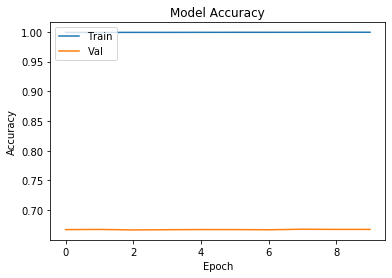

In [104]:
#visualize the model accuracy
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc = 'upper left')
plt.show()


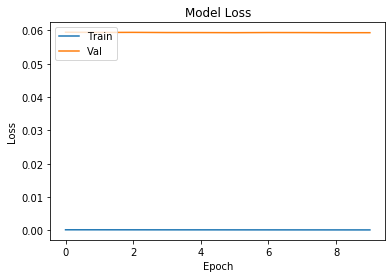

In [105]:
#visualize the model loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc = 'upper left')
plt.show()


In [106]:
#load data
from google.colab import files
uploaded = files.upload()
my_image = plt.imread('dog.24.jpg')

Saving dog.24.jpg to dog.24.jpg


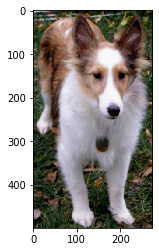

In [107]:
#show image uploaded
img = plt.imshow(my_image)

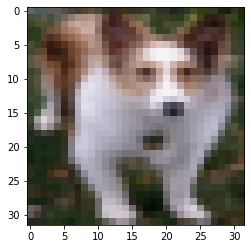

In [108]:
#resize image
from skimage.transform import resize
my_image_resized = resize(my_image, (32, 32, 3))
img = plt.imshow(my_image_resized)

In [109]:
#get probabilities(xác suất) for each class
import numpy as np
probabilities = model.predict(np.array([my_image_resized,] ) )

#print probabilities
probabilities

array([[2.1975480e-18, 3.8490621e-15, 2.8190138e-03, 1.0825931e-03,
        7.1418584e-18, 9.9433774e-01, 2.9011142e-09, 1.7606921e-03,
        5.5858020e-15, 4.6488885e-12]], dtype=float32)

In [110]:
number_to_class = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
index = np.argsort(probabilities[0,:])
print('most likely class:', number_to_class[index[9]], '--probabilty:', probabilities[0, index[9]])


most likely class: dog --probabilty: 0.99433774
